In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fetal_df = pd.read_csv("fetal_health.csv")
fetal_df


#preliminary correlation analysis


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


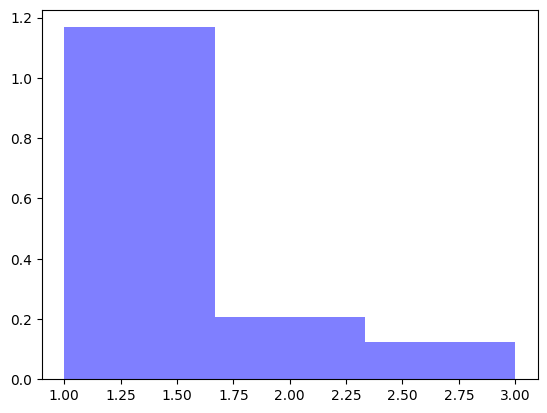

In [82]:
#2 Histogram for class
plt.hist(fetal_df['fetal_health'], bins=3, density=True, alpha=0.5, color='b')
plt.show()

#will likely need a stratified kfold since incidences of 2 and 3 (suspect and pathological are quite low)

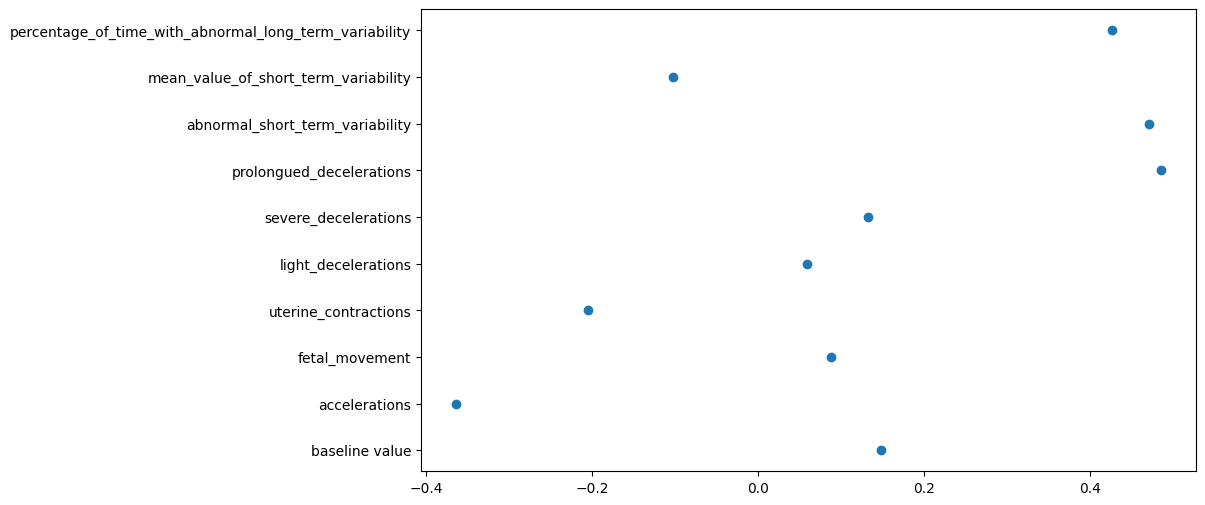

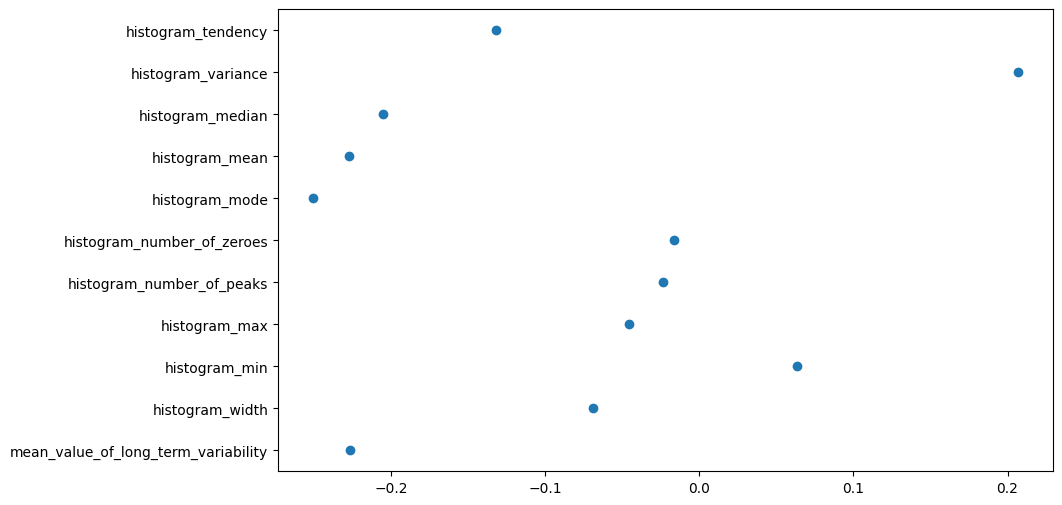

In [83]:
#1 correlations

fh = fetal_df['fetal_health']

correlation_values_1 = [fh.corr(fetal_df['baseline value']), fh.corr(fetal_df['accelerations']), fh.corr(fetal_df['fetal_movement']),
                                fh.corr(fetal_df['uterine_contractions']),fh.corr(fetal_df['light_decelerations']),fh.corr(fetal_df['severe_decelerations']),
                                    fh.corr(fetal_df['prolongued_decelerations']),fh.corr(fetal_df['abnormal_short_term_variability']),fh.corr(fetal_df['mean_value_of_short_term_variability']),
                                       fh.corr(fetal_df['percentage_of_time_with_abnormal_long_term_variability'])]
correlation_values_2 = [fh.corr(fetal_df['mean_value_of_long_term_variability']),fh.corr(fetal_df['histogram_width']),
                                          fh.corr(fetal_df['histogram_min']),fh.corr(fetal_df['histogram_max']),fh.corr(fetal_df['histogram_number_of_peaks']),
                                              fh.corr(fetal_df['histogram_number_of_zeroes']),fh.corr(fetal_df['histogram_mode']),fh.corr(fetal_df['histogram_mean']),
                                                      fh.corr(fetal_df['histogram_median']),fh.corr(fetal_df['histogram_variance']),fh.corr(fetal_df['histogram_tendency'])]

feature_names_1 = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations',
                 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']


feature_names_2 = ['mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
                 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']

plt.figure(figsize=(10, 6))
plt.scatter(correlation_values_1, feature_names_1)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(correlation_values_2, feature_names_2)
plt.show()

In [84]:
#3 Scaling, encoding
print(fetal_df.isnull().sum())

from sklearn.preprocessing import StandardScaler

#no missing values
#no categorical features needed for encoding, target variable already encoded in dataset

#scaling
#Recommended to scale for neural networks

scaler = StandardScaler()

y = fetal_df['fetal_health']
X = fetal_df.drop('fetal_health', axis=1)
X = X.values
y = y.values

#reshaping y
#y = y.reshape(-1, 1)

#Was having issues with y being represented as 1, 2, 3 instead of 0, 1, 2
for val in range(len(y)):
  y[val] -= 1

X_scaled = scaler.fit_transform(X)
#y_scaled = scaler.fit_transform(y)
print(y)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def cross_validate_model (classifier_model, X, y):
    stratfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=18)

               # perform model cross validation on the shuffled folds
    results = cross_val_score(classifier_model, X, y, cv=stratfold)

              # return the mean score for all folds
    return results.mean()

Unique values in y_train: [0. 1. 2.]
Unique values in y_valid: [0. 1. 2.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11267 (44.01 KB)
Trainable params: 11267 (44.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/15
38/38 [==============================] - 2s 17ms/step - loss: 0.6564 - accuracy: 0.7542 - val_loss: 0.3984 - val_accuracy: 0.8700
Epoch 2/15
38/38 [==============================] - 0s 9ms/step 

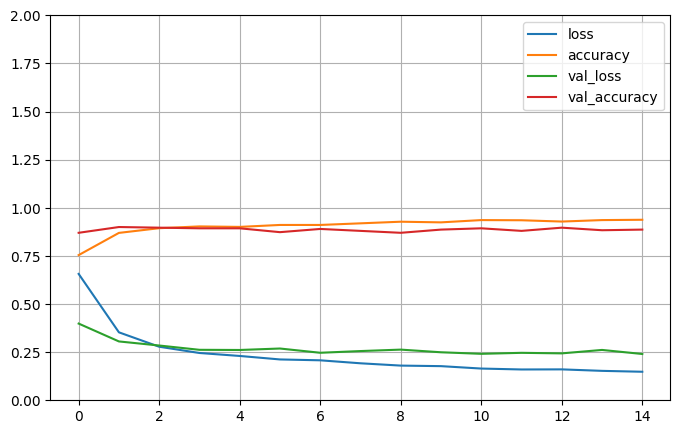

In [86]:
#4 Creating sequential neural model
#used https://keras.io/guides/sequential_model/ as guide

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=15)

#create validation for #6
X_valid, X_train = X_train[:300], X_train[300:]
y_valid, y_train = y_train[:300], y_train[300:]

model = keras.models.Sequential()
model.add(Dense(units=128, activation='relu', input_dim=21))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_valid:", np.unique(y_valid))

print(model.summary())

keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

print()
print()

#Confusion Matrix and Loss/Accuracy for the model with simple split data
print("Loss and Accuracy: ", model.evaluate(X_test, y_test))

y_pred = model.predict(X_test)
#converts prediction to either 0, 1, or 2
y_pred_whole = np.argmax(y_pred, axis=1)

print()
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_whole))

#Displays accuracy values from validation and testing data set
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [95]:
#Cross validate model with KFold

#Create stratified kfold with 4 splits and continue with random state of 15 for reproducability
n_splits = 4
strat = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

# Create lists to store accuracies
accuracy_values = []

for train_index, test_index in strat.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = keras.models.Sequential()
    model.add(Dense(units=128, activation='relu', input_dim=21))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=15, verbose=0)


    _, accuracy = model.evaluate(X_test, y_test)
    accuracy_values.append(accuracy)

print("Average Accuracy:", np.mean(accuracy_values))


17/17 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9322
Average Accuracy: 0.9144046604633331


In [98]:
#DISCLAIMER
#Attempted to use GridSearch with a Keras Classifier, but the package was not able to found.
#Was unable to get terminal to run and download necessary package
#Considering why I had to switch to colab instead of anaconda, I just decided to do manual hyperparameter tuning for now

#64, 32, 3 units

n_splits = 4
strat = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

# Create lists to store accuracies
accuracy_values = []

for train_index, test_index in strat.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = keras.models.Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=21))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=15, verbose=0)


    _, accuracy = model.evaluate(X_test, y_test)
    accuracy_values.append(accuracy)

print("Average Accuracy:", np.mean(accuracy_values))


17/17 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9134
Average Accuracy: 0.9087575972080231


In [99]:
# Units

n_splits = 4
strat = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

# Create lists to store accuracies
accuracy_values = []

for train_index, test_index in strat.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = keras.models.Sequential()
    model.add(Dense(units=256, activation='relu', input_dim=21))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=15, verbose=0)


    _, accuracy = model.evaluate(X_test, y_test)
    accuracy_values.append(accuracy)

print("Average Accuracy:", np.mean(accuracy_values))


17/17 [==============================] - 0s 3ms/step - loss: 0.1706 - accuracy: 0.9360
Average Accuracy: 0.925221785902977


In [100]:
#Additional layers

n_splits = 4
strat = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

# Create lists to store accuracies
accuracy_values = []

for train_index, test_index in strat.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = keras.models.Sequential()
    model.add(Dense(units=128, activation='relu', input_dim=21))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=15, verbose=0)


    _, accuracy = model.evaluate(X_test, y_test)
    accuracy_values.append(accuracy)

print("Average Accuracy:", np.mean(accuracy_values))


17/17 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9322
Average Accuracy: 0.9167569428682327


In [101]:
#Additional layers

n_splits = 4
strat = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

# Create lists to store accuracies
accuracy_values = []

for train_index, test_index in strat.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = keras.models.Sequential()
    model.add(Dense(units=256, activation='relu', input_dim=21))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=15, verbose=0)


    _, accuracy = model.evaluate(X_test, y_test)
    accuracy_values.append(accuracy)

print("Average Accuracy:", np.mean(accuracy_values))


17/17 [==============================] - 0s 4ms/step - loss: 0.1660 - accuracy: 0.9473
Average Accuracy: 0.92899090051651
